In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib as mpl

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from math import sqrt

In [4]:
df = pd.read_csv('Dataset.csv')

In [5]:
columns_name=df.columns.tolist()

In [6]:
print(columns_name)

['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


In [7]:
df.shape

(8950, 18)

In [8]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [9]:
df.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531283,0.322802,0.398684,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095843,0.065008,0.132569,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356963,0.603264,0.093860,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319724,0.567292,0.048755,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256499,0.384084,0.132172,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303985,0.453238,0.140107,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119788,0.103464,0.003030,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295038,0.243537,-0.030327,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060755,0.085551,0.030073,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.098838,-0.249773,-0.133372


In [10]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## checking the datatypes of different columns

In [11]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

### Removing "CUST_ID" because non numerical columns are of no use to us

In [12]:
df=df.drop(['CUST_ID'],axis=1)

In [13]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [14]:
columns_name=df.columns.tolist()

In [15]:
df[columns_name].isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [16]:
column_means=df.mean()

### Filling the NaN values with their respective column means

In [17]:
df=df.fillna(column_means)

In [18]:
df[columns_name].isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

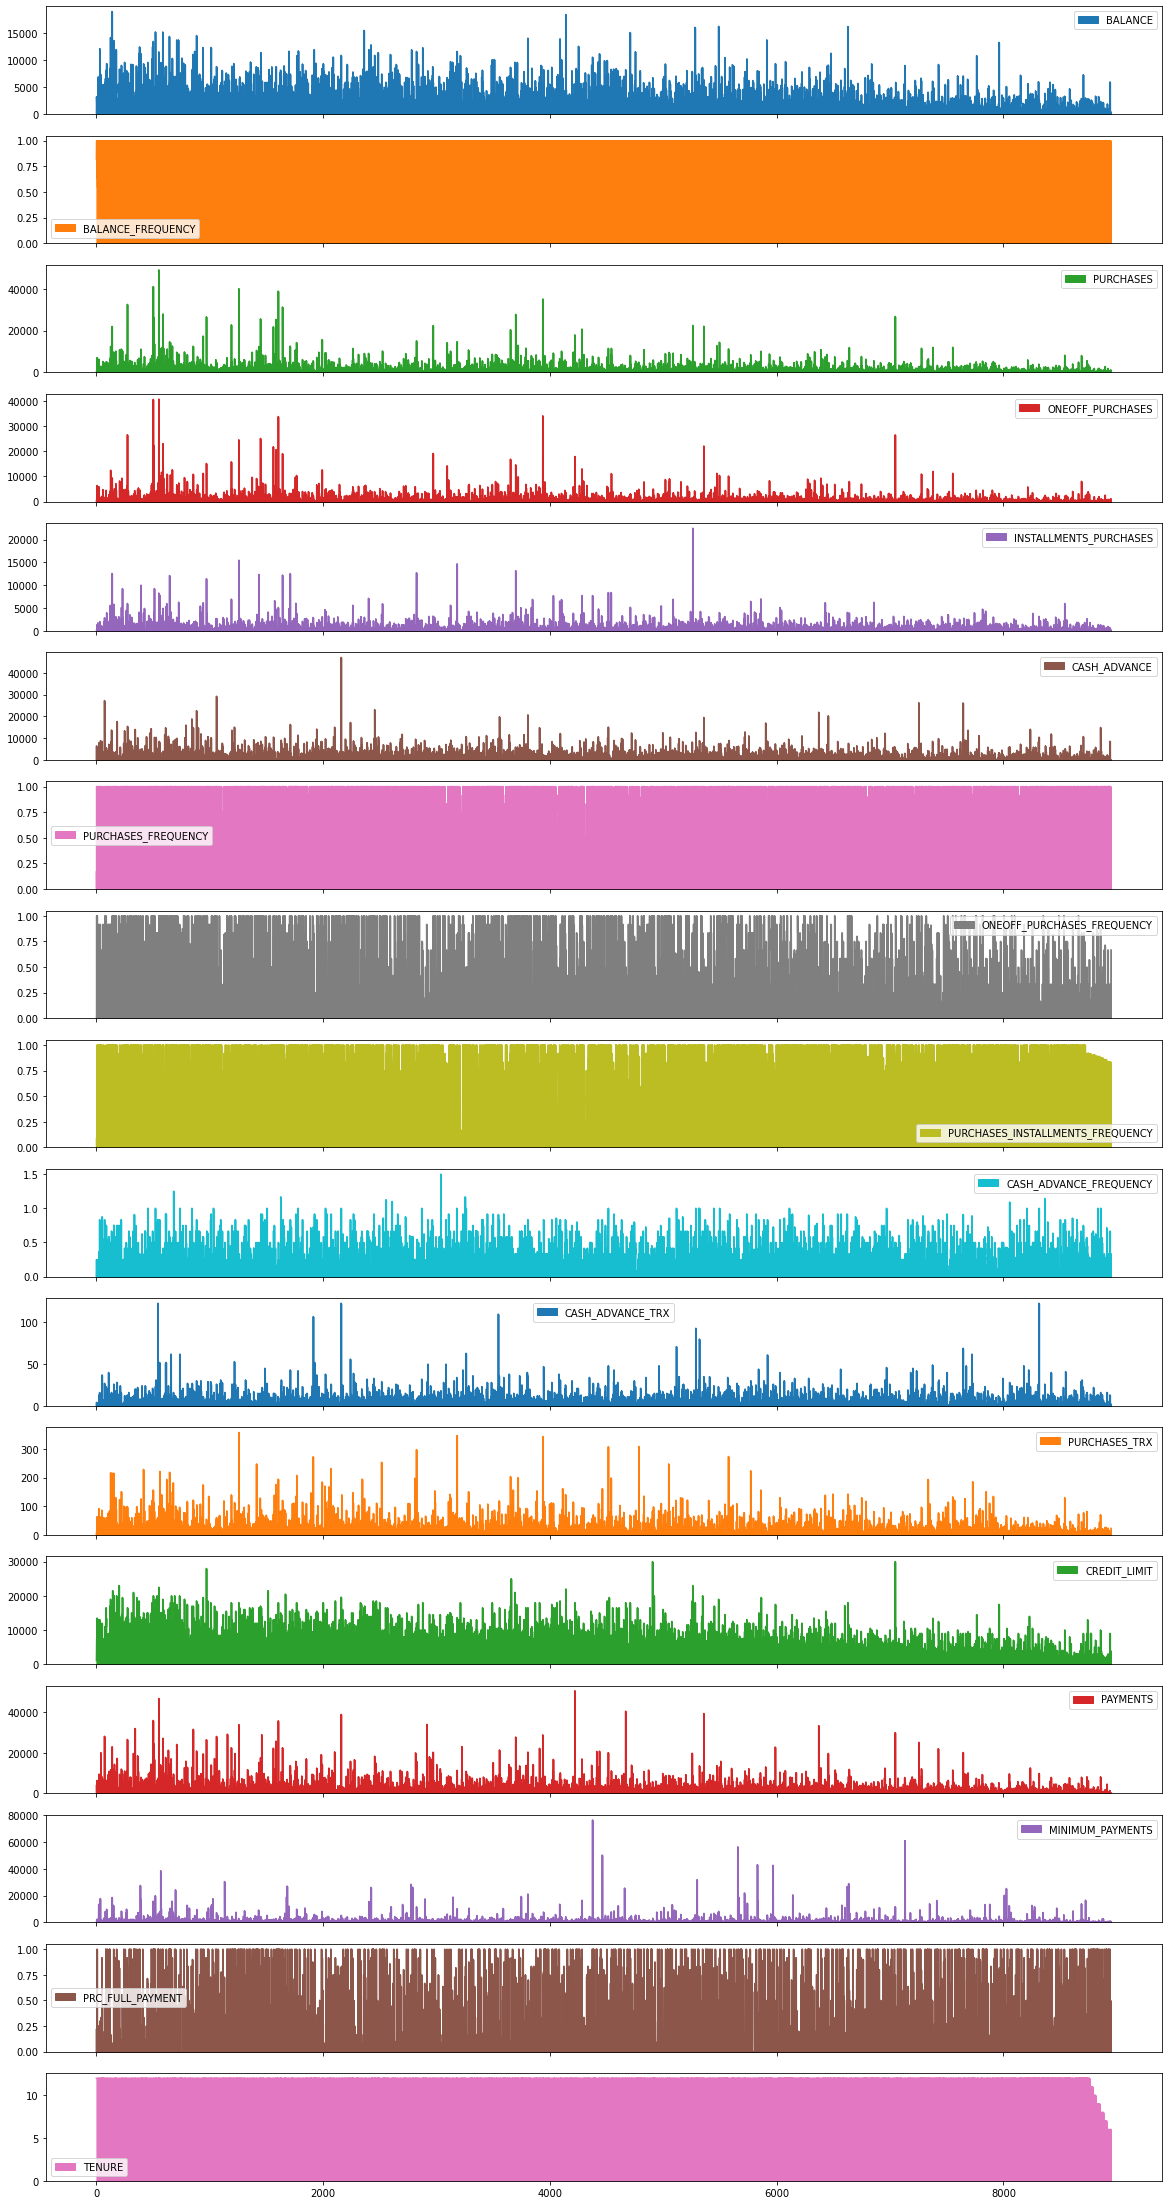

In [19]:
df.plot.area(figsize = (20,40),subplots=True)

In [20]:
df.skew(axis=0)

BALANCE                              2.393386
BALANCE_FREQUENCY                   -2.023266
PURCHASES                            8.144269
ONEOFF_PURCHASES                    10.045083
INSTALLMENTS_PURCHASES               7.299120
CASH_ADVANCE                         5.166609
PURCHASES_FREQUENCY                  0.060164
ONEOFF_PURCHASES_FREQUENCY           1.535613
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
CASH_ADVANCE_FREQUENCY               1.828686
CASH_ADVANCE_TRX                     5.721298
PURCHASES_TRX                        4.630655
CREDIT_LIMIT                         1.522549
PAYMENTS                             5.907620
MINIMUM_PAYMENTS                    13.867357
PRC_FULL_PAYMENT                     1.942820
TENURE                              -2.943017
dtype: float64

### Removing the skewness using Square Root Method

In [21]:
sqrt_skew = np.sqrt(df[columns_name])

In [22]:
sqrt_skew.skew()

BALANCE                             0.829498
BALANCE_FREQUENCY                  -2.819495
PURCHASES                           1.730752
ONEOFF_PURCHASES                    2.129460
INSTALLMENTS_PURCHASES              1.546939
CASH_ADVANCE                        1.486159
PURCHASES_FREQUENCY                -0.421872
ONEOFF_PURCHASES_FREQUENCY          0.724607
PURCHASES_INSTALLMENTS_FREQUENCY    0.130409
CASH_ADVANCE_FREQUENCY              0.706976
CASH_ADVANCE_TRX                    1.417779
PURCHASES_TRX                       1.185757
CREDIT_LIMIT                        0.680933
PAYMENTS                            1.951535
MINIMUM_PAYMENTS                    3.805340
PRC_FULL_PAYMENT                    1.297280
TENURE                             -3.064332
dtype: float64

In [23]:
sqrt_skew

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,6.395369,0.904534,9.767292,0.000000,9.767292,0.000000,0.408249,0.000000,0.288675,0.000000,0.000000,1.414214,31.622777,14.205706,11.811426,0.000000,3.464102
1,56.590347,0.953463,0.000000,0.000000,0.000000,80.267961,0.000000,0.000000,0.000000,0.500000,2.000000,0.000000,83.666003,64.054919,32.746606,0.471404,3.464102
2,49.951465,1.000000,27.805935,27.805935,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.464102,86.602540,24.941266,25.045654,0.000000,3.464102
3,40.824877,0.797724,38.716921,38.716921,0.000000,14.345313,0.288675,0.288675,0.000000,0.288675,1.000000,1.000000,86.602540,0.000000,29.397390,0.000000,3.464102
4,28.595705,1.000000,4.000000,4.000000,0.000000,0.000000,0.288675,0.288675,0.000000,0.000000,0.000000,1.000000,34.641016,26.044861,15.645806,0.000000,3.464102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,5.337932,1.000000,17.062239,0.000000,17.062239,0.000000,1.000000,0.000000,0.912871,0.000000,0.000000,2.449490,31.622777,18.044236,6.991879,0.707107,2.449490
8946,4.379865,1.000000,17.320508,0.000000,17.320508,0.000000,1.000000,0.000000,0.912871,0.000000,0.000000,2.449490,31.622777,16.609073,29.397390,0.000000,2.449490
8947,4.837217,0.912871,12.016655,0.000000,12.016655,0.000000,0.912871,0.000000,0.816497,0.000000,0.000000,2.236068,31.622777,9.015031,9.078456,0.500000,2.449490
8948,3.668455,0.912871,0.000000,0.000000,0.000000,6.046386,0.000000,0.000000,0.000000,0.408249,1.414214,0.000000,22.360680,7.249135,7.466969,0.500000,2.449490


In [24]:
sqrt_skew.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,31.780551,0.921054,22.855845,14.278686,13.021440,18.494035,0.584054,0.297600,0.435160,0.239918,1.102261,2.879521,62.139544,34.645065,23.557147,0.210447,3.386634
std,23.548531,0.170098,21.928723,19.712937,15.541452,25.237134,0.386326,0.337498,0.418441,0.278554,1.426210,2.533557,25.163411,23.085123,17.586981,0.330816,0.219169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.071068,0.000000,0.138430,0.000000,2.449490
25%,11.326160,0.942809,6.295629,0.000000,0.000000,0.000000,0.288675,0.000000,0.000000,0.000000,0.000000,1.000000,40.000000,19.577440,13.071253,0.000000,3.464102
50%,29.553091,1.000000,19.007366,6.164414,9.433981,0.000000,0.707107,0.288675,0.408249,0.000000,0.000000,2.645751,54.772256,29.272881,18.320161,0.000000,3.464102
75%,45.322621,1.000000,33.318613,24.029248,21.648037,33.373959,0.957427,0.547723,0.866025,0.471404,2.000000,4.123106,80.622577,43.601999,29.397390,0.377964,3.464102
max,137.996879,1.000000,221.448798,201.894155,150.000000,217.111059,1.000000,1.000000,1.000000,1.224745,11.090537,18.920888,173.205081,225.214305,276.416728,1.000000,3.464102


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

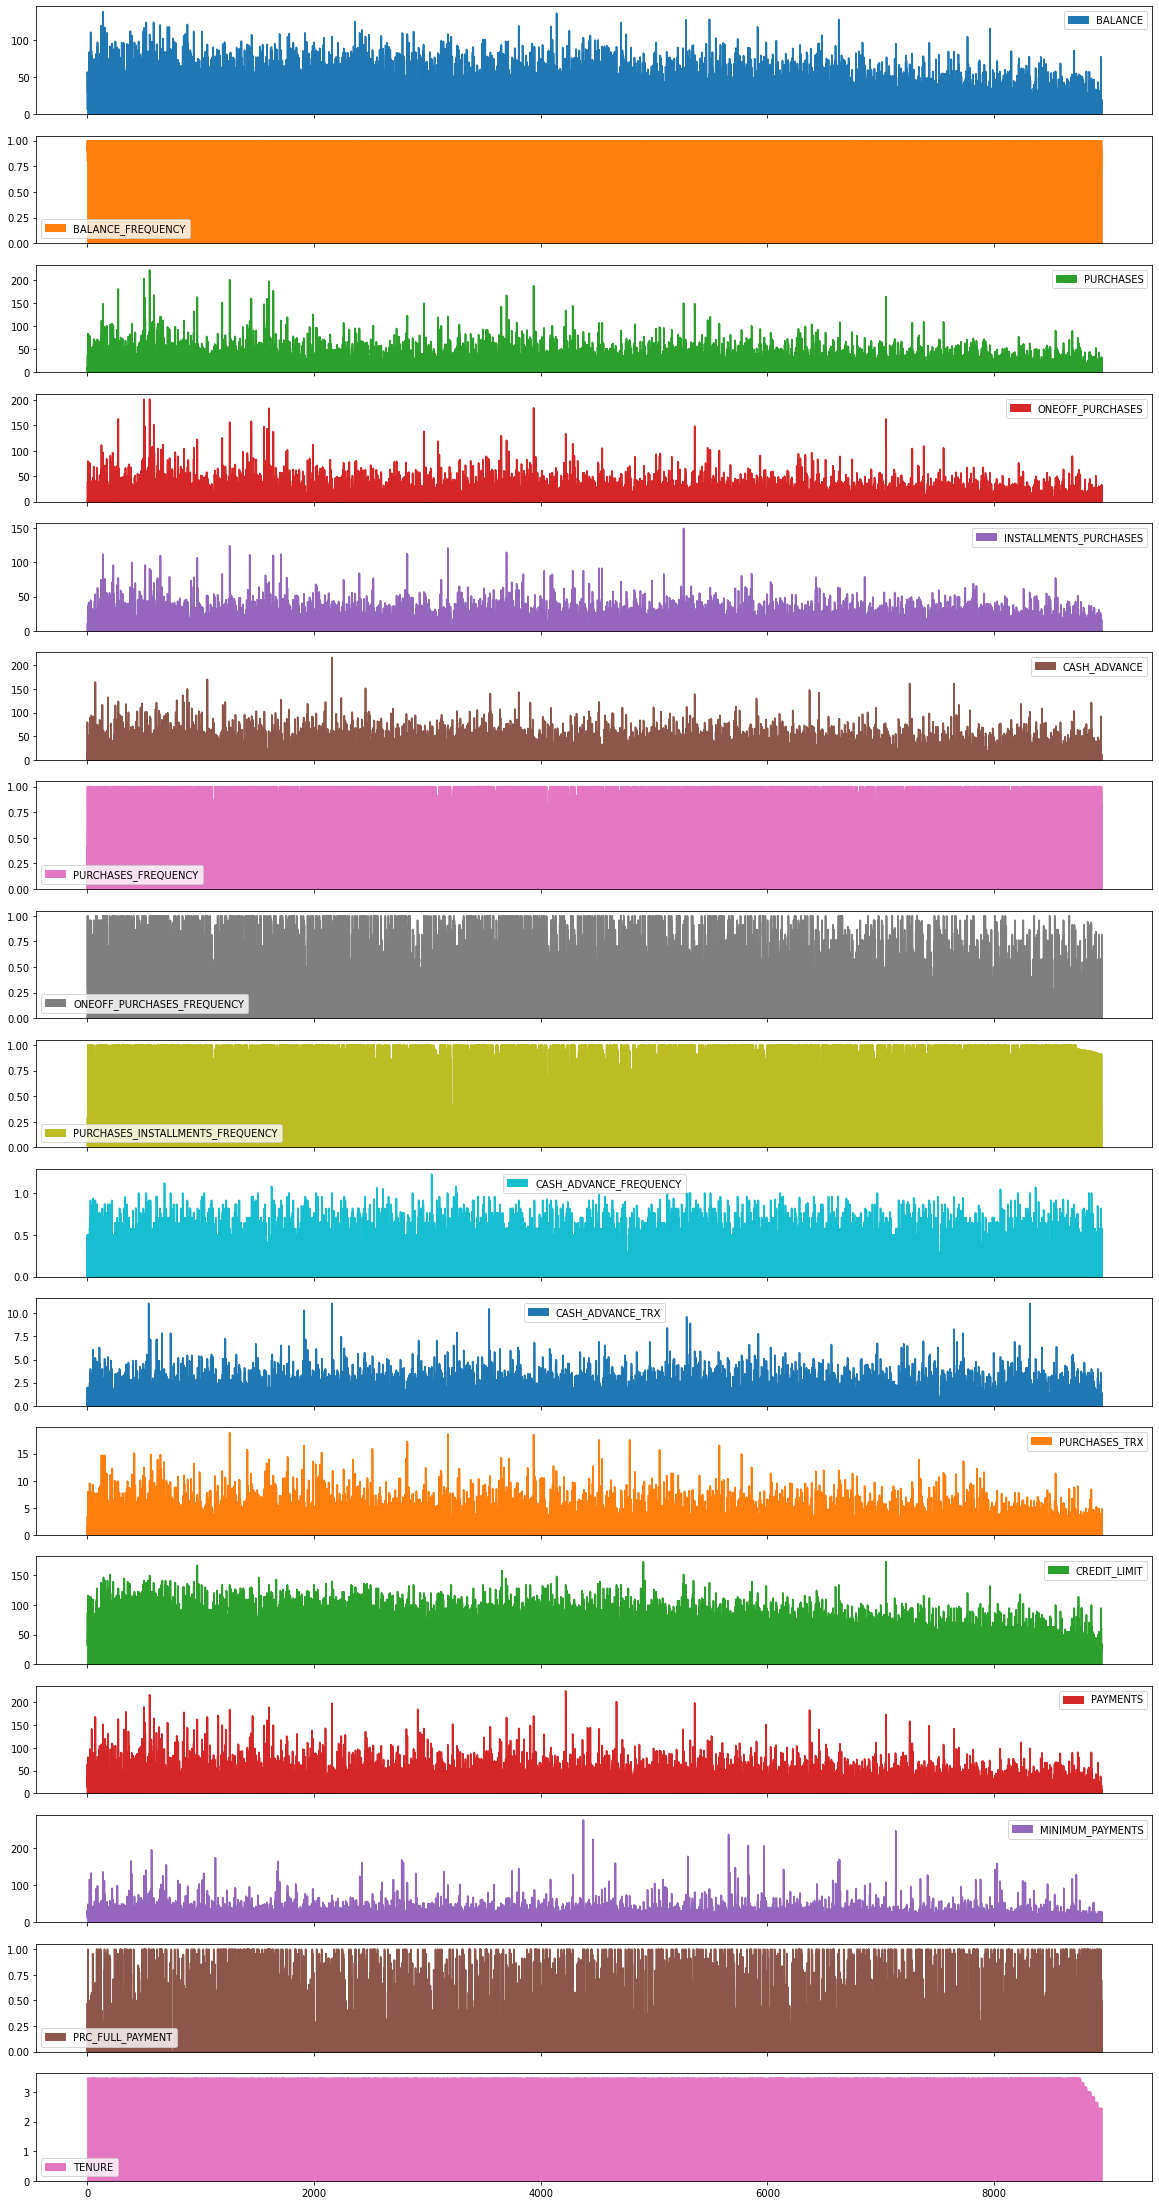

In [25]:
sqrt_skew.plot.area(figsize = (20,40), subplots = True)

Text(0.5, 1.0, 'Correlation between different features')

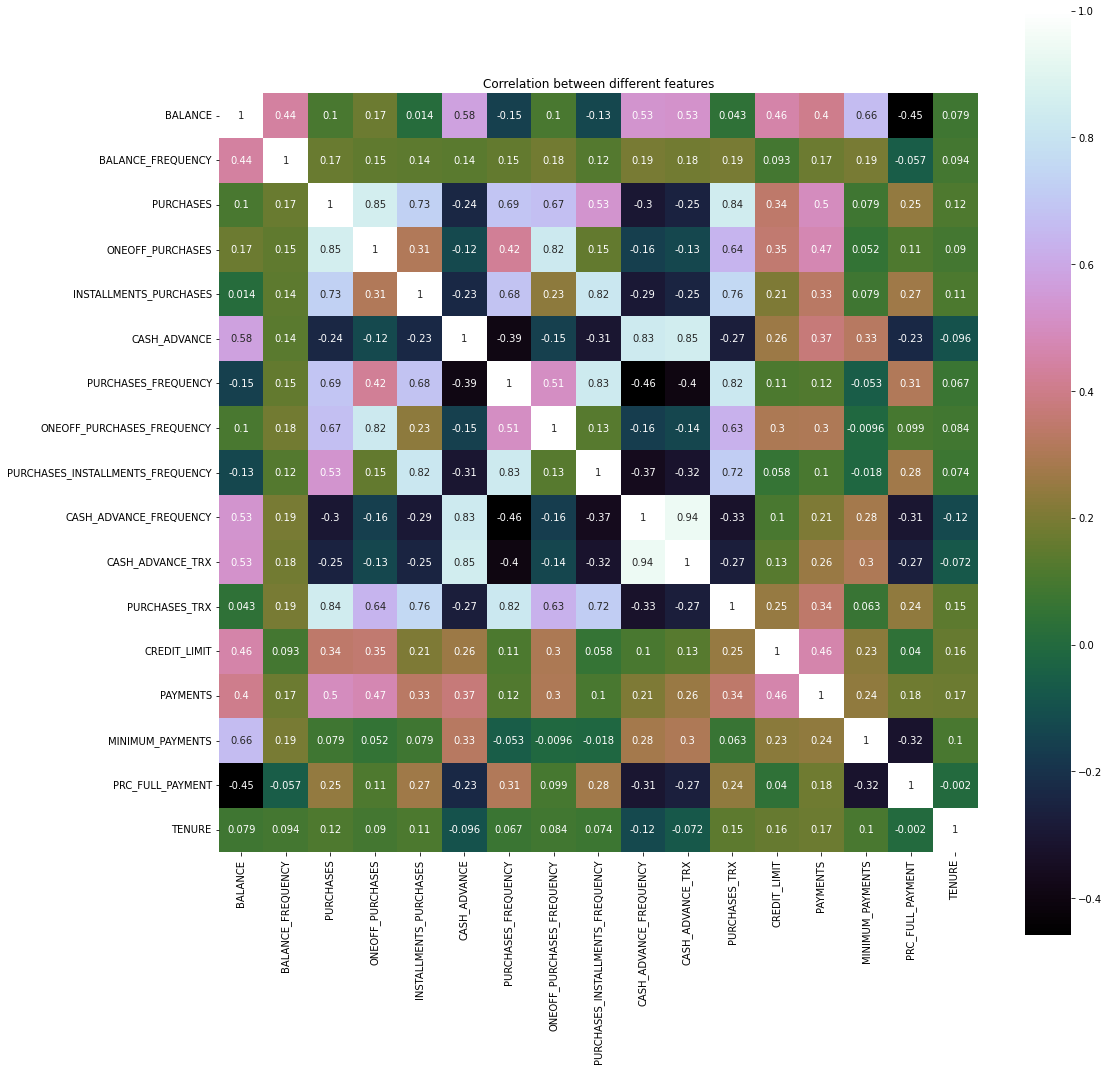

In [26]:
correlation = sqrt_skew.corr()
plt.figure(figsize=(17,17))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different features')

In [27]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(sqrt_skew)

In [28]:
X_std

array([[-1.0780545 , -0.09712559, -0.59690132, ..., -0.66790184,
        -0.63618182,  0.35348056],
       [ 1.05361908,  0.19053935, -1.0423371 , ...,  0.52254404,
         0.78887411,  0.35348056],
       [ 0.77167992,  0.46414608,  0.22574803, ...,  0.08464159,
        -0.63618182,  0.35348056],
       ...,
       [-1.14422589, -0.04811222, -0.49431949, ..., -0.82330785,
         0.87531901, -4.27612743],
       [-1.19386072, -0.04811222, -1.0423371 , ..., -0.91494252,
         0.87531901, -4.27612743],
       [-0.52978249, -0.61472285,  0.46555636, ..., -0.8052387 ,
        -0.63618182, -4.27612743]])

Text(0, 0.5, 'Cumulative explained variance')

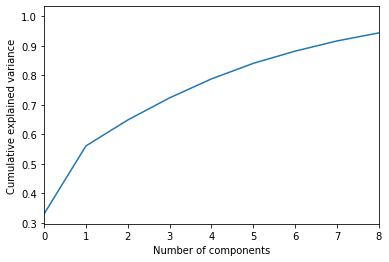

In [29]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,8,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

### Took 7 components because variance>90 percent for 7 components

In [30]:
from sklearn.decomposition import PCA 
sklearn_pca = PCA(n_components=7)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [31]:
print(Y_sklearn)

[[-0.88512191 -2.48301693  0.23090242 ...  0.04336989 -0.38202562
  -0.35720617]
 [-3.00034342  2.01508943 -0.16533426 ...  1.67093843 -0.28801526
   0.94274938]
 [ 1.19172624  0.38517395 -1.92678896 ... -0.55010278 -0.23006842
   0.52287556]
 ...
 [ 0.10596162 -3.06675754  1.18931984 ... -2.96585047  1.26333337
   1.97973232]
 [-2.84716017 -2.51797947 -0.29519488 ... -2.99036079  0.69668999
   1.77427724]
 [-0.16460436 -0.5243077  -1.64424995 ... -4.69253162  1.53231934
   0.09281539]]


In [32]:
Y_sklearn.shape

(8950, 7)

### Clustering Starts

In [33]:
datafr= pd.DataFrame(Y_sklearn , columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])

In [34]:
datafr

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-0.885122,-2.483017,0.230902,0.807129,0.043370,-0.382026,-0.357206
1,-3.000343,2.015089,-0.165334,-1.087171,1.670938,-0.288015,0.942749
2,1.191726,0.385174,-1.926789,1.859338,-0.550103,-0.230068,0.522876
3,-0.794805,0.218433,-1.661542,1.195618,0.058950,0.798510,-0.086756
4,-1.265058,-1.593317,-0.689436,1.339644,-0.114019,-0.837737,0.231600
...,...,...,...,...,...,...,...
8945,0.668484,-2.871696,1.452469,-2.236975,-2.854943,0.766981,2.343375
8946,0.262604,-2.240280,1.844972,-0.568118,-3.339266,1.706628,1.774529
8947,0.105962,-3.066758,1.189320,-1.775107,-2.965850,1.263333,1.979732
8948,-2.847160,-2.517979,-0.295195,-2.148352,-2.990361,0.696690,1.774277


### Finding out the error and plotting it

In [35]:
from sklearn.cluster import KMeans
wcss = []
m= range(1,11)
for i in m:
    kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state = 42)
    kmeans.fit(datafr)
    wcss.append(kmeans.inertia_)

### took k=3 using elbow method

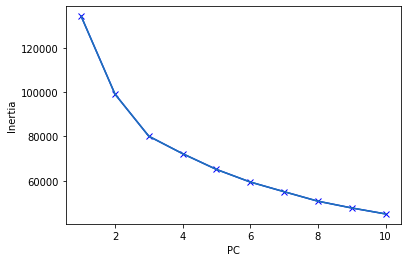

In [36]:
plt.plot(m,wcss,'bx-')
plt.plot(range(1,11), wcss)
plt.xlabel('PC')
plt.ylabel('Inertia')
plt.show()

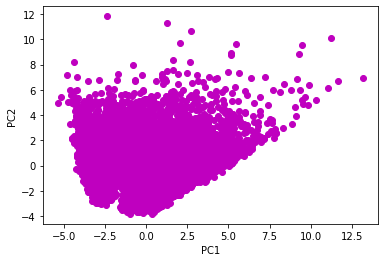

In [37]:
X = datafr[["PC1","PC2","PC3","PC4","PC5","PC6","PC7"]]
plt.scatter(X["PC1"], X["PC2"], c="m")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


### Assigning Random Centroids

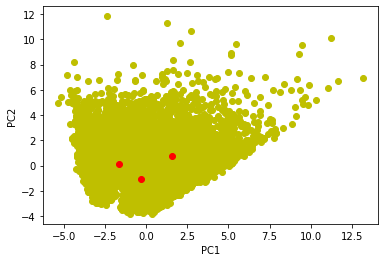

In [48]:
k=3
centroids=(X.sample (n=k))
plt.scatter(X["PC1"],X["PC2"], c="y")
plt.scatter(centroids["PC1"],centroids["PC2"], c="red")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [49]:
centroids

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,1,2,3,Cluster,4,5
877,-1.654070,0.099492,0.954454,0.023044,0.386790,0.765667,-0.641968,5.759893,3.124054,3.445984,4,1.906225,3.343470
4447,-0.287786,-1.082672,1.021399,1.415307,0.249694,-0.193645,0.507460,5.054449,2.489642,4.466127,5,3.666212,2.240600
149,1.585774,0.753191,0.909693,-0.346714,1.008424,0.125549,0.715952,3.110557,3.900050,3.472760,5,4.796739,2.803909


### MAIN CODE for clustering

In [50]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1, row_c in centroids.iterrows():
        ED=[]
        for index2, row_d in XD.iterrows():
            d1 = (row_c["PC1"]-row_d["PC1"])**2
            d2 = (row_c["PC2"]-row_d["PC2"])**2
            d3 = (row_c["PC3"]-row_d["PC3"])**2
            d4 = (row_c["PC4"]-row_d["PC4"])**2
            d5 = (row_c["PC5"]-row_d["PC5"])**2
            d6 = (row_c["PC6"]-row_d["PC6"])**2
            d7 = (row_c["PC7"]-row_d["PC7"])**2
            d = sqrt(d1+d2+d3+d4+d5+d5+d7)
            ED.append(d)
        X[i] = ED
        i = i+1
    
    C = []
    for index, row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(k):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos = i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["PC1","PC2","PC3","PC4","PC5","PC6","PC7"]]
    if j == 0:
        diff = 1
        j = j+1
    else:
        diff = (Centroids_new['PC1'] - centroids['PC1']).sum() + (Centroids_new['PC2'] - centroids['PC2']).sum() + (Centroids_new['PC3'] - centroids['PC3']).sum() + (Centroids_new['PC4'] - centroids['PC4']).sum() + (Centroids_new['PC5'] - centroids['PC5']).sum() + (Centroids_new['PC6'] - centroids['PC6']).sum() + (Centroids_new['PC7'] - centroids['PC7']).sum()
        print(diff.sum())
    centroids = X.groupby(["Cluster"]).mean()[["PC1","PC2","PC3","PC4","PC5","PC6","PC7"]]

0.5613325682471532
0.2891228617371055
0.10308343748007748
0.03547648327362533
0.028957731401996548
0.02458460594111343
0.016515069204156914
0.008393655456429916
0.0022799311952690464
0.0


In [51]:
Centroids_new

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Cluster,,,,,,,
1,-2.497500,0.901362,-0.024554,-0.162105,-0.003202,-0.114194,0.034681
2,0.581518,-1.503500,0.166582,0.110200,0.075860,0.063265,0.027772
3,2.925036,1.603686,-0.301938,0.040905,-0.150665,0.058345,-0.114312


In [52]:
X

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,1,2,3,Cluster,4,5
0,-0.885122,-2.483017,0.230902,0.807129,0.043370,-0.382026,-0.357206,3.900817,1.936660,5.676598,2,3.857854,2.535301
1,-3.000343,2.015089,-0.165334,-1.087171,1.670938,-0.288015,0.942749,2.966291,5.716626,6.657661,1,2.843885,6.099162
2,1.191726,0.385174,-1.926789,1.859338,-0.550103,-0.230068,0.522876,4.734776,3.522771,3.340821,3,5.028311,4.373455
3,-0.794805,0.218433,-1.661542,1.195618,0.058950,0.798510,-0.086756,2.812681,3.064829,4.361957,1,2.974653,4.080622
4,-1.265058,-1.593317,-0.689436,1.339644,-0.114019,-0.837737,0.231600,3.240832,2.403303,5.453159,2,3.191316,3.345684
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.668484,-2.871696,1.452469,-2.236975,-2.854943,0.766981,2.343375,7.234710,5.619919,7.352157,2,7.423512,5.474457
8946,0.262604,-2.240280,1.844972,-0.568118,-3.339266,1.706628,1.774529,6.814234,5.504452,7.123680,2,7.038795,5.487992
8947,0.105962,-3.066758,1.189320,-1.775107,-2.965850,1.263333,1.979732,6.923659,5.439160,7.451009,2,7.084500,5.416231
8948,-2.847160,-2.517979,-0.295195,-2.148352,-2.990361,0.696690,1.774277,6.058466,6.320839,8.648340,1,6.062351,6.719783


### Final Clustering

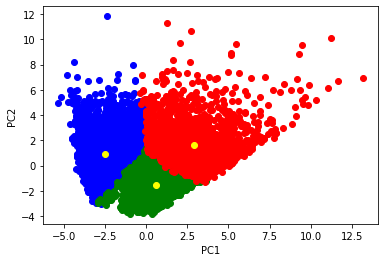

In [54]:
color=['blue','green','red']
for h in range(k):
    data=X[X["Cluster"]==h+1]
    plt.scatter(data["PC1"],data["PC2"],c=color[h])
plt.scatter(centroids["PC1"],centroids["PC2"],c='yellow')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()